In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from architectures import *
from torch.utils.tensorboard import SummaryWriter
%config Completer.use_jedi = False

# Test whether aggregation moduls have correct dimensionality:
$ f : \mathcal{P}\left( \mathbb{R}^{(B \times C \times H \times W)} \right) \rightarrow \mathbb{R}^{(B \times C \times H \times W)} $ 

In [3]:
S,B,C,H,W = 4, 5, 64, 256, 256    # Sequence length, Batch size, Channels, Height, Width
x = torch.rand(B, S, 3, H, W)
net = DeepAggNet(planes=16,agg_block=AttentionAggregation)
#net = DeepAggNet()
net(x).size()

torch.Size([5, 3, 256, 256])

In [15]:
x = torch.rand(10,64,256,256)*100
w = torch.ones(10,64,256,256)
softm = nn.Softmax(0)
w = softm(w)
(x.mean(0) - (x*w).sum(0)).mean()

tensor(-8.7497e-07)

# Train Model

In [1]:
import datasets
import torch
from architectures import *
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
import torchvision
%config Completer.use_jedi = False

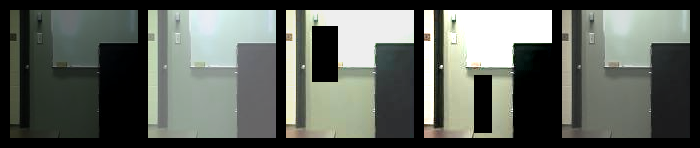

In [2]:
root = "dataset2014/dataset/baseline/office/groundtruth/"
dataset = datasets.ImageData("dataset2014/dataset/baseline/office/input/")
show = transforms.ToPILImage()

x,y  = dataset[55]

show = transforms.ToPILImage()
showSeq = lambda xs: [show(x.squeeze(0)) for x in torch.split(xs,1)]
showSeq(x)
grid = torchvision.utils.make_grid(x, nrow=10, padding=10)
show(grid)

In [4]:
train_loader = DataLoader(dataset)
net = DeepAggNet(planes=16,agg_block=AttentionAggregation)
trainer = pl.Trainer(gpus=1)
trainer.fit(net, train_loader)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type                 | Params
----------------------------------------------------
0 | input      | Conv2d               | 448   
1 | output     | Conv2d               | 435   
2 | downsample | Sequential           | 23.1 K
3 | upsample   | Sequential           | 23.1 K
4 | encoder    | Sequential           | 738 K 
5 | agg        | AttentionAggregation | 25.2 K
6 | decoder    | Sequential           | 738 K 
7 | smooth     | Sequential           | 32.5 K
----------------------------------------------------
1.6 M     Trainable params
0         Non-trainable params
1.6 M     Total params


Epoch 0:   3%|█▋                                               | 71/2050 [00:06<02:49, 11.66it/s, loss=0.0749, v_num=2]


1

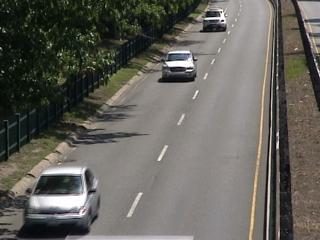

In [22]:
import torchvision

dataset = torchvision.datasets.ImageFolder("dataset2014/dataset/baseline/highway/")
x,y = dataset[2001]
X = []